In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [8]:
golddata=pd.read_csv('gld_price_data.csv')

In [9]:
golddata.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
golddata.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
#no of rows and colums
golddata.shape

(2290, 6)

In [13]:
#info about data
golddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
#checking the number of missing values
golddata.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
#statistical measures of data
golddata.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [24]:
golddata['Date'] = pd.to_datetime(golddata['Date'])

In [25]:
numericdata = golddata.select_dtypes(include=[np.number])

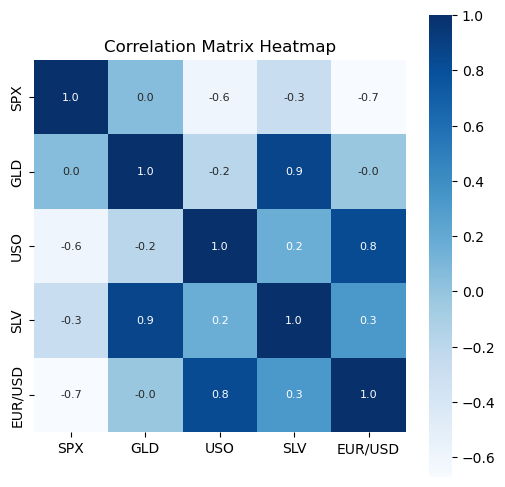

In [28]:
correlation=numericdata.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [30]:
print(correlation['USO'])

SPX       -0.591573
GLD       -0.186360
USO        1.000000
SLV        0.167547
EUR/USD    0.829317
Name: USO, dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_34280\4188667788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numericdata['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

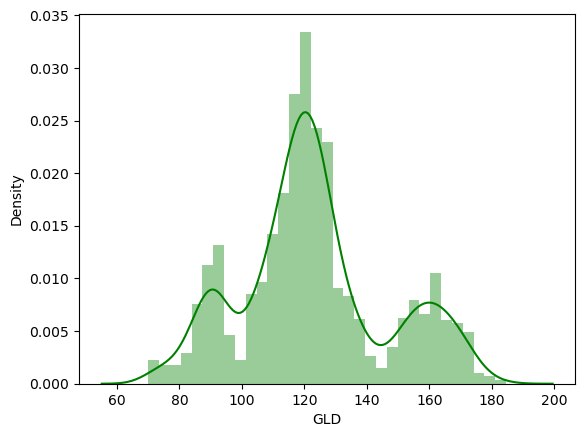

In [31]:
#checking the distribution of gold data
sns.distplot(numericdata['GLD'],color='green')

In [32]:
#splitting the features and target, axis=1 for dropping colum and axis =0 for dropping row
X=golddata.drop(['Date','GLD'],axis=1)
Y=golddata['GLD']

In [33]:
golddata.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [36]:
#splitting into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [37]:
#model training
regressor=RandomForestRegressor(n_estimators=100)


In [38]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
#model prediction
test_data_prediction=regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[168.7552998   81.69430014 116.23650044 127.5225006  120.84430143
 154.73999798 150.46639801 126.03060027 117.52809895 126.02640077
 116.52270087 171.57870038 141.75489905 167.53039883 115.32790019
 117.45060044 139.57130264 170.5046015  159.49290276 160.58389992
 154.9217997  125.26080015 175.40469915 157.67160342 125.16210031
  93.72619973  77.80450002 120.49519982 119.06379909 167.55339978
  88.03650028 125.07949996  90.8921008  117.65280024 121.19409947
 137.61420095 115.58030104 114.91130055 147.1253995  107.32930079
 104.5490024   87.22749774 126.44110076 117.86729984 153.98219878
 119.74710006 108.39119994 108.0440985   93.14960032 127.02849816
  75.53370038 113.76079885 121.15520007 111.37839889 118.93649887
 120.69899922 159.58240041 170.12410114 146.88079727  85.78399845
  94.15410076  86.90539895  90.44050017 119.05560064 126.39870074
 127.60139988 169.41340035 122.39019943 117.41389916  98.5224005
 168.42800052 142.83719854 132.24680249 121.1023024  121.57629934
 119.914900

In [41]:
#R squared error
errorscore=metrics.r2_score(Y_test,test_data_prediction)

In [42]:
print("R squared error=", errorscore)

R squared error= 0.9893169587242534


In [43]:
#comparing actual and compared values
Y_test=list(Y_test)

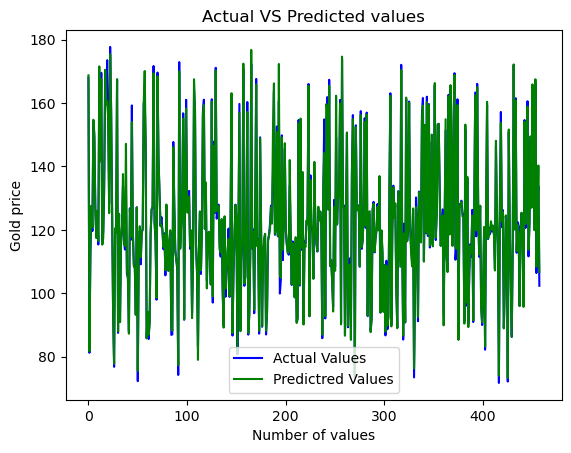

In [48]:
plt.plot(Y_test, color='Blue',label='Actual Values')
plt.plot(test_data_prediction, color='Green', label='Predictred Values')
plt.title('Actual VS Predicted values')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()